# Esercizio di riscaldamento

In [21]:
list_names = ["pippo","pluto","paperino"]

# Costruire una funzione che mi dice il nome selezionato ha n lettere
# Esempio: pippo ha 5 lettere
for name in list_names:
    print( name, "ha", len(name), "lettere." )
    print( f"{name} ha {len(name)} lettere." )

pippo ha 5 lettere.
pippo ha 5 lettere.
pluto ha 5 lettere.
pluto ha 5 lettere.
paperino ha 8 lettere.
paperino ha 8 lettere.


In [29]:
# Step di generalizzazione

def ContaLettere(list_name_input, list_index):
    string_evaluation = f"{list_name_input[list_index]} ha {len(list_name_input[list_index])} lettere."
    return string_evaluation

def InserisciNome(list_name_input, new_name):
    list_name_input.append(new_name)
    return

In [30]:
list_names = ["pippo","pluto","paperino"]

for i in range(len(list_names)):
    print(ContaLettere(list_names,i))
    
InserisciNome(list_names, "topolino")

print(list_names)

pippo ha 5 lettere.
pluto ha 5 lettere.
paperino ha 8 lettere.
['pippo', 'pluto', 'paperino', 'topolino']


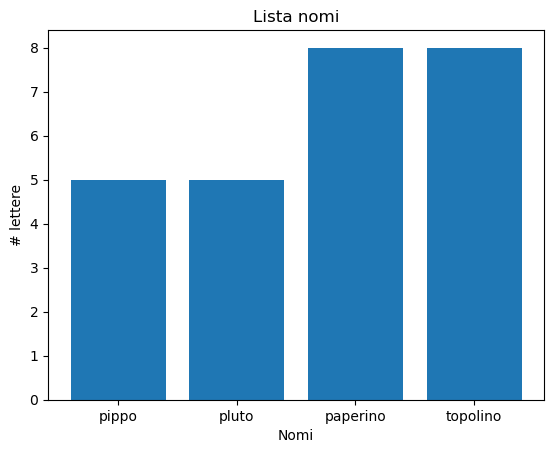

In [36]:
# grafico a barre in cui asse x = nomi, asse y = numero di lettere

from matplotlib import pyplot as plt 

x_axis = list_names
y_axis = [ len(e) for e in x_axis ] # for in line

plt.bar(x_axis, y_axis)

plt.title("Lista nomi")
plt.xlabel("Nomi")
plt.ylabel("# lettere")

plt.show()

# Costruire la Classifica di Serie A

### Versione 1

In [32]:
array_squadra = ["Inter","Juventus","Milan"]
array_punteggio = [41,37,32]

Classifica_serieA = dict()
for i in range(len(array_squadra)):
    Classifica_serieA[array_squadra[i]] = array_punteggio[i]
    
print(Classifica_serieA)
print("Punteggio Juventus:",Classifica_serieA["Juventus"])

{'Inter': 41, 'Juventus': 37, 'Milan': 32}
Punteggio Juventus: 37


### Versione 2

In [37]:
# costruisco una funzione a 3 parametri: diz, squadra, punt. diz[squadra] = punteggio

# Classifica_serieA = {}

def creaClassifica (dict_input, squadra, punteggio):
    dict_input[squadra] = punteggio
    return dict_input

for i in range(20):
    squadra = input("Inserisci una squadra: ")
    punteggio = input(f"Inserisci il punteggio della squadra {squadra}: ")
    Classifica_serieA = creaClassifica(Classifica_serieA, squadra, punteggio)

In [41]:
Classifica_serieA["Monza"] = 21

In [42]:
Classifica_serieA

{'Inter': '41',
 'Juventus': '37',
 'Milan': '32',
 'Bologna': '28',
 'Fiorentina': '27',
 'Napoli': '27',
 'Atalanta': '26',
 'Roma': '25',
 'Torino': '23',
 'Monza': 21,
 'Lazio': '21',
 'Lecce': '20',
 'Frosinone': '19',
 'Genoa': '16',
 'Sassuolo': '16',
 'Cagliari': '13',
 'Udinese': '13',
 'Empoli': '12',
 'Hellas Verona': '11',
 'Salernitana': '8'}

#### vorrei convertire tutti i valori in numeri

In [46]:
stringa = "21"
numero = int(stringa)

for squadra in Classifica_serieA:
    Classifica_serieA[squadra] = int(Classifica_serieA[squadra])

Classifica_serieA

{'Inter': 41,
 'Juventus': 37,
 'Milan': 32,
 'Bologna': 28,
 'Fiorentina': 27,
 'Napoli': 27,
 'Atalanta': 26,
 'Roma': 25,
 'Torino': 23,
 'Monza': 21,
 'Lazio': 21,
 'Lecce': 20,
 'Frosinone': 19,
 'Genoa': 16,
 'Sassuolo': 16,
 'Cagliari': 13,
 'Udinese': 13,
 'Empoli': 12,
 'Hellas Verona': 11,
 'Salernitana': 8}

# Connessione a SQL Server

In [10]:
import pyodbc

# py ODBC: Open DataBase Connection
print(pyodbc.drivers())
driver = '{ODBC Driver 17 for SQL Server}'

['SQL Server', 'SQL Server Native Client 11.0', 'SQL Server Native Client RDA 11.0', 'ODBC Driver 17 for SQL Server', 'Microsoft Access Driver (*.mdb, *.accdb)', 'Microsoft Excel Driver (*.xls, *.xlsx, *.xlsm, *.xlsb)', 'Microsoft Access Text Driver (*.txt, *.csv)']


In [13]:
# La mia prima connessione
driver = '{ODBC Driver 17 for SQL Server}'
server = 'localhost'
database = 'testPython'
conn_string = f"DRIVER={driver};SERVER={server};DATABASE={database};Trusted_Connection=yes;"

print(conn_string)

DRIVER={ODBC Driver 17 for SQL Server};SERVER=localhost;DATABASE=testPython;Trusted_Connection=yes;


In [14]:
cnxn = pyodbc.connect(conn_string)

### Creazione di una tabella

In [16]:
cursor = cnxn.cursor()

query = 'create table dbo.Colori (id int identity(1,1), colore varchar(50))'
result = cursor.execute(query)
result.commit()

### Inserimento di record

In [24]:
query = "insert into dbo.Colori(colore) values ('rosso'),('bianco'),('verde')"

cursor.execute(query)
cursor.commit()

### Lettura di record

In [29]:
query = "SELECT [id],[colore] FROM [dbo].[Colori]"

table = []
cursor.execute(query)
for row in cursor:
    table.append(row)

In [28]:
# il cursore è oneshot: nel momento in cui apro il contenuto di una riga viene eliminata dal cursore
for row in cursor:
    print(row)

In [30]:
table

[(1, 'rosso'),
 (2, 'bianco'),
 (3, 'verde'),
 (4, 'rosso'),
 (5, 'bianco'),
 (6, 'verde')]

In [31]:
query = "SELECT [id],[colore] FROM [dbo].[Colori]"

table = []
cursor.execute(query)
table = cursor.fetchall()

In [32]:
table

[(1, 'rosso'),
 (2, 'bianco'),
 (3, 'verde'),
 (4, 'rosso'),
 (5, 'bianco'),
 (6, 'verde')]

### Creazione della Classifica di Serie A tramite stored_procedure

```sql 
create procedure dbo.jsonInput @json nvarchar(max) as
-- isjson, json_value, json_query, openjson

IF ISJSON(@json) = 1
	drop table if exists dbo.Classifica_SerieA

	create table dbo.Classifica_SerieA (
	id int identity(1,1),
	Squadra varchar(20),
	Punteggio tinyint
	)

	insert into dbo.Classifica_SerieA
		select [key] as Squadra, [value] as Punteggio
		from openjson(@json)
```

In [35]:
query = f"exec dbo.jsonInput "
print(query)

exec dbo.jsonInput 


`%pip install json`

In [39]:
import json

Classifica_serieA_JSON = json.dumps(Classifica_serieA)
query = f"exec dbo.jsonInput '{Classifica_serieA_JSON}'"
cursor.execute(query)
cursor.commit()

cursor.execute("Select * from dbo.Classifica_SerieA")
print(cursor.fetchall())

[(1, 'Inter', 41), (2, 'Juventus', 37), (3, 'Milan', 32), (4, 'Bologna', 28), (5, 'Fiorentina', 27), (6, 'Napoli', 27), (7, 'Atalanta', 26), (8, 'Roma', 25), (9, 'Torino', 23), (10, 'Monza', 21), (11, 'Lazio', 21), (12, 'Lecce', 20), (13, 'Frosinone', 19), (14, 'Genoa', 16), (15, 'Sassuolo', 16), (16, 'Cagliari', 13), (17, 'Udinese', 13), (18, 'Empoli', 12), (19, 'Hellas Verona', 11), (20, 'Salernitana', 8)]


In [40]:
cursor.execute("truncate table dbo.Classifica_SerieA").commit()

In [41]:
for item in Classifica_serieA:
    cursor.execute( "insert into dbo.Classifica_SerieA values (?,?)", item, Classifica_serieA[item]).commit()

cursor.execute("Select * from dbo.Classifica_SerieA")
print(cursor.fetchall())

[(1, 'Inter', 41), (2, 'Juventus', 37), (3, 'Milan', 32), (4, 'Bologna', 28), (5, 'Fiorentina', 27), (6, 'Napoli', 27), (7, 'Atalanta', 26), (8, 'Roma', 25), (9, 'Torino', 23), (10, 'Monza', 21), (11, 'Lazio', 21), (12, 'Lecce', 20), (13, 'Frosinone', 19), (14, 'Genoa', 16), (15, 'Sassuolo', 16), (16, 'Cagliari', 13), (17, 'Udinese', 13), (18, 'Empoli', 12), (19, 'Hellas Verona', 11), (20, 'Salernitana', 8)]
